In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv("PeopleCare_TrainData.csv")

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Interested in getting Policy from PeopleCare
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0


In [4]:
df.shape

(381098, 12)

In [5]:
import pandas as pd
def preprocess(df):
    df=df.drop(columns=["id"],axis=1)
    df=df.rename(columns={'Interested in getting Policy from PeopleCare':'Target'})
    df=pd.get_dummies(df,columns=["Gender","Vehicle_Age","Vehicle_Damage"],drop_first=True,dtype=int)    
    return df.dropna()

In [6]:
df=preprocess(df)
df.head()


,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Target,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44.0,1.0,28.0,0.0,40454.0,26.0,217.0,1.0,1,0,1,1
1,76.0,1.0,3.0,0.0,33536.0,26.0,183.0,0.0,1,0,0,0
2,47.0,1.0,28.0,0.0,38294.0,26.0,27.0,1.0,1,0,1,1
3,21.0,1.0,11.0,1.0,28619.0,152.0,203.0,0.0,1,1,0,0
4,29.0,1.0,41.0,1.0,27496.0,152.0,39.0,0.0,0,1,0,0


In [7]:
df.shape[0]

91430

In [8]:
test_size=int(0.1*df.shape[0])
val_size=int(0.2*df.shape[0])

In [9]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=["Target"]),df["Target"],test_size=test_size,random_state=1)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=val_size,random_state=1)

In [10]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_val=sc.transform(X_val)

In [11]:
report={"Model_Name":[],"Accuracy":[],"Precision":[],"Recall":[],"Roc_Score":[]}
def model(model_n,model, X_train, y_train, X_val, y_val):
    # Fit the model on the training data
    report["Model_Name"].append(model_n)
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_val)

    # Evaluate the model using accuracy, precision, recall, and ROC score
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    roc_score = roc_auc_score(y_val, y_pred)
    
    report["Accuracy"].append(accuracy)
    report["Precision"].append(precision)
    report["Recall"].append(recall)
    report["Roc_Score"].append(roc_score)
    
    
    print("Model_name:",model_n)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('ROC Score:', roc_score)
    print("*****"*5)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
model_dict={"Logistic Regression":LogisticRegression(random_state=32),
            "Decision Tree":DecisionTreeClassifier(random_state=32),
            "Random Forest":RandomForestClassifier(random_state=32),
            "XGBoost":XGBClassifier(random_state=32),
            "CatBoost":CatBoostClassifier(random_state=32),
            "LightGBM":LGBMClassifier(random_state=32),
            "Naive Bayes":GaussianNB(),
            "AdaBoost":AdaBoostClassifier(random_state=32),
            "Gradient Boosting":GradientBoostingClassifier(random_state=32),
            }
            


In [13]:
for i,j in model_dict.items():
    model(i,j, X_train, y_train, X_val, y_val)

Model_name: Logistic Regression
Accuracy: 0.7919720004374932
Precision: 0.7206791330881778
Recall: 0.9752249867654844
ROC Score: 0.7857122558530509
*************************
Model_name: Decision Tree
Accuracy: 0.7145903970250465
Precision: 0.7314855390008764
Recall: 0.7069348861831657
ROC Score: 0.7148519018632149
*************************
Model_name: Random Forest
Accuracy: 0.7878705020234059
Precision: 0.7513093733068449
Recall: 0.8808893594494441
ROC Score: 0.7846930679161032
*************************
Model_name: XGBoost
Accuracy: 0.8030187028327682
Precision: 0.7541982076046289
Recall: 0.9177342509264161
ROC Score: 0.7991001307793488
*************************
Learning rate set to 0.060838
0:	learn: 0.6418255	total: 166ms	remaining: 2m 45s
1:	learn: 0.6008973	total: 178ms	remaining: 1m 28s
2:	learn: 0.5690496	total: 192ms	remaining: 1m 3s
3:	learn: 0.5439569	total: 209ms	remaining: 52s
4:	learn: 0.5244242	total: 221ms	remaining: 44s
5:	learn: 0.5086927	total: 232ms	remaining: 38.5s


c:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 227, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

Model_name: LightGBM
Accuracy: 0.8082139341572788
Precision: 0.7541952054794521
Recall: 0.9326627845420857
ROC Score: 0.8039628819215349
*************************
Model_name: Naive Bayes
Accuracy: 0.7928469867658318
Precision: 0.7208902772354548
Recall: 0.9773425092641609
ROC Score: 0.7865447983488545
*************************
Model_name: AdaBoost
Accuracy: 0.8049874220715302
Precision: 0.7476202510319265
Recall: 0.9396506087877183
ROC Score: 0.8003874579963928
*************************
Model_name: Gradient Boosting
Accuracy: 0.8064092748550804
Precision: 0.7517264898968369
Recall: 0.9335097935415564
ROC Score: 0.8020676441975398
*************************


In [35]:
report_df=pd.DataFrame(report)
report_df.sort_values(by=['Accuracy','Precision','Recall','Roc_Score'], ascending=False, inplace=True)
report_df.reset_index(inplace=True)
report_df.drop(columns=["index"],inplace=True)
report_df

,Model_Name,Accuracy,Precision,Recall,Roc_Score
0,LightGBM,0.808214,0.754195,0.932663,0.803963
1,Gradient Boosting,0.806409,0.751726,0.933510,0.802068
2,CatBoost,0.806136,0.755102,0.924510,0.802092
3,AdaBoost,0.804987,0.747620,0.939651,0.800387
4,XGBoost,0.803019,0.754198,0.917734,0.799100
5,Naive Bayes,0.792847,0.720890,0.977343,0.786545
6,Logistic Regression,0.791972,0.720679,0.975225,0.785712
7,Random Forest,0.787871,0.751309,0.880889,0.784693
8,Decision Tree,0.714590,0.731486,0.706935,0.714852


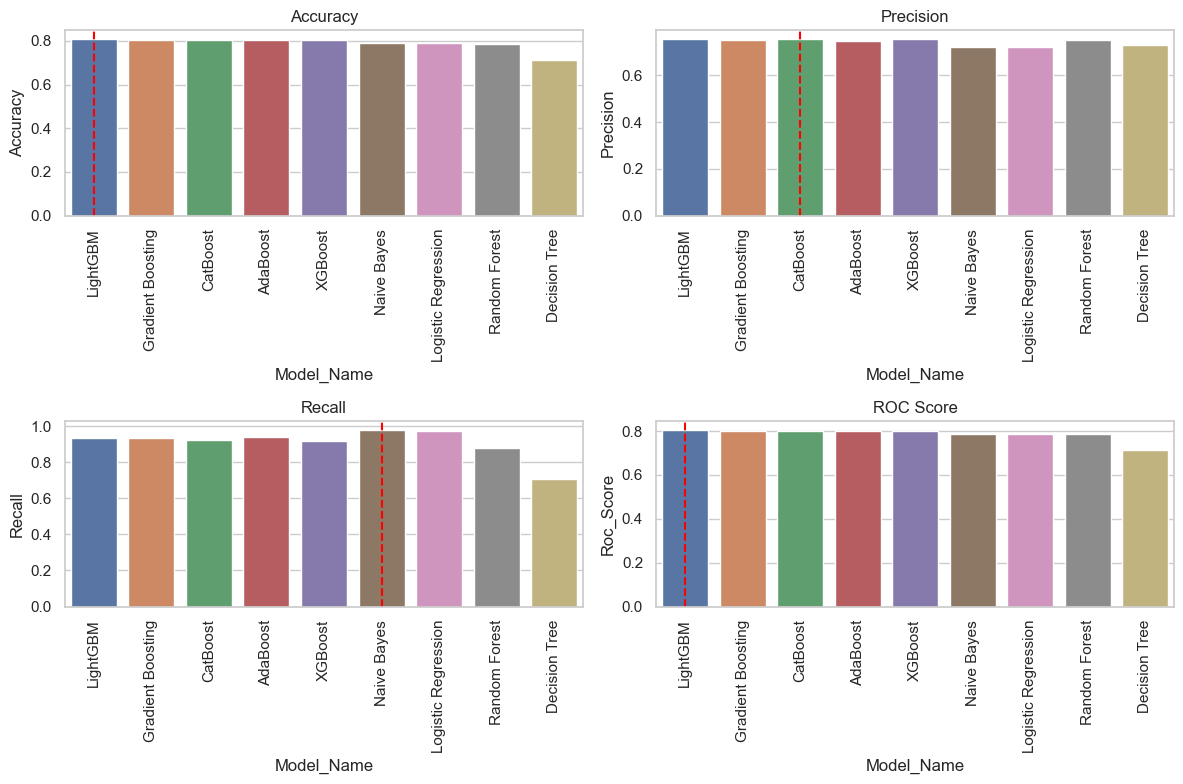

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the 'report_df' DataFrame

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for Accuracy, Precision, Recall, and ROC Score
plt.figure(figsize=(12, 8))

# Plot 1: Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x="Model_Name", y="Accuracy", data=report_df)
plt.xticks(rotation=90)
plt.title("Accuracy")
max_accuracy_model = report_df['Accuracy'].idxmax()
plt.axvline(x=max_accuracy_model, color='red', linestyle='--')

# Plot 2: Precision
plt.subplot(2, 2, 2)
sns.barplot(x="Model_Name", y="Precision", data=report_df)
plt.title("Precision")
plt.xticks(rotation=90)
max_Precision_model = report_df['Precision'].idxmax()
plt.axvline(x=max_Precision_model, color='red', linestyle='--')

# Plot 3: Recall
plt.subplot(2, 2, 3)
sns.barplot(x="Model_Name", y="Recall", data=report_df)
plt.title("Recall")
plt.xticks(rotation=90)
max_recall_model =report_df['Recall'].idxmax()
plt.axvline(x=max_recall_model, color='red', linestyle='--')

# Plot 4: ROC Score
plt.subplot(2, 2, 4)
sns.barplot(x="Model_Name", y="Roc_Score", data=report_df)
plt.title("ROC Score")
plt.xticks(rotation=90)
max_Roc_Score_model =report_df['Roc_Score'].idxmax()
plt.axvline(x=max_Roc_Score_model, color='red', linestyle='--')

# Adjust plot layout
plt.tight_layout()


# Show the plots
plt.show()


## we choose LightGBM model as the final model and tune it better for test data

In [41]:
from sklearn.model_selection import RandomizedSearchCV
# Define the LightGBM classifier
lgb_classifier = LGBMClassifier()

# Define the hyperparameters and their respective search ranges
param_dist = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'num_leaves': [10, 20, 30, 40, 50],
    'min_child_samples': [10, 20, 30, 40, 50],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.0, 0.1, 0.5, 1.0]
}

n_iter_search = 50  
random_search = RandomizedSearchCV(estimator=lgb_classifier, param_distributions=param_dist, n_iter=n_iter_search,
                                   cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Perform the randomized search
random_search.fit(X_train, y_train)

# Print the best hyperparameters found by randomized search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best LightGBM classifier with the optimized hyperparameters
best_lgb_classifier = LGBMClassifier(**best_params)

# Fit the best classifier on the training data
best_lgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_lgb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 32595, number of negative: 31406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 64001, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509289 -> initscore=0.037160
[LightGBM] [Info] Start training from score 0.037160
Best Hyperparameters: {'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'num_leaves': 20, 'n_estimators': 200, 'min_child_samples': 10, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
[LightGBM] [Info] Number of positive: 32595, number of negative: 31406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003570 seconds.
You

In [47]:
import joblib

import pickle

with open('lgb_model.bin', 'wb') as f_out:
    pickle.dump(best_lgb_classifier, f_out)

In [48]:
with open('standardscaler.bin','wb') as f_out:
    pickle.dump(sc,f_out)